# UNSUPERVISED LEARNING

## K-MEANS CLUSTERING

- En çok kullanılanları göreceğiz
- K-Means, hierarchical (Dendrogram), PCA
- Clustering çok önemli
- Unlabel data ile çalışılır
- KMeans: Clustering için kullanılır. Müşterileri farklı gruplara ayırıp reklam,indirim vs. stratejisinde kullanılır
- KMeans, distance based olduğu için scale yapmak gerekir

Customer Segmentation Final Ürünü

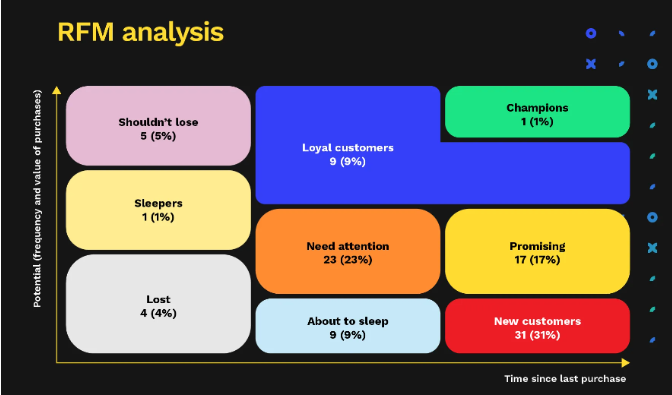

## K_Means Intro

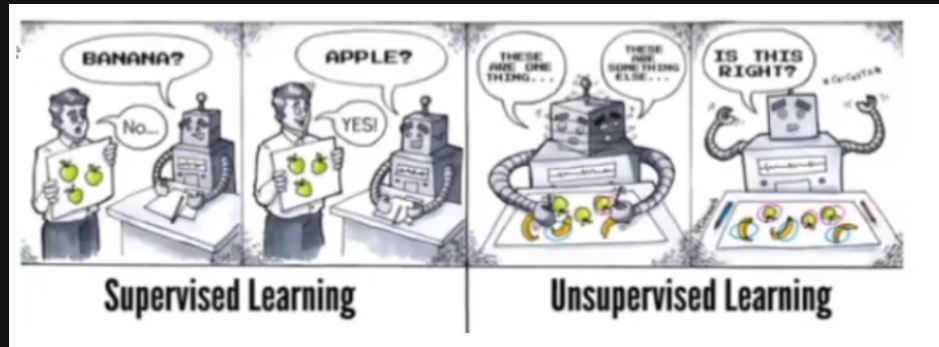

KMeans: benzer özelliklere sahip veri gruplarını kümeler halinde bulmaya yönelik bir algoritma.

En yaygın unsupervised öğrenme algoritmaları arasında şunlar bulunur:

1. K-Means Kümeleme: Bu algoritma, verileri benzerliklerine göre kümelere ayırır. Her küme, küme içindeki veri noktalarının ortalaması olan bir merkez etrafında gruplanır.

2. Hiyerarşik Kümeleme: Veri noktalarını adım adım birleştirerek veya bölererek bir ağaç yapısı (dendrogram) oluşturur. Bu yöntem, veri noktaları arasındaki ilişkilerin daha ayrıntılı bir şekilde incelenmesine olanak tanır.

3. DBSCAN (Density-Based Spatial Clustering of Applications with Noise): Yoğunluk tabanlı bir kümeleme yöntemi olan DBSCAN, veri noktalarını yoğunluklarına göre gruplandırır ve aykırı değerleri (outliers) etkili bir şekilde tespit eder.

4. Principal Component Analysis (PCA): Özellik indirgeme (dimensionality reduction) için kullanılan PCA, veri setindeki varyansı maksimize eden yeni bir özellik uzayı oluşturur. Bu, özellikle çok boyutlu veri setlerinde önemlidir.

5. T-Distributed Stochastic Neighbor Embedding (t-SNE): Yüksek boyutlu verileri düşük boyutlu bir uzaya indirgeyerek görselleştirmeyi sağlar. Özellikle karmaşık veri setlerinin görsel analizi için kullanışlıdır.

6. Autoencoders: Sinir ağları temelli bir unsupervised öğrenme modeli olan autoencoders, veriyi sıkıştırıp sonra tekrar çözerek (reconstruct) veri setindeki önemli özellikleri öğrenmeye çalışır.

7. Generative Adversarial Networks (GANs): İki ağ yapısını (bir üretici ve bir ayırıcı) rekabet halinde kullanarak, gerçekçi veri üretimi yapabilen bir yapay zeka modelidir.

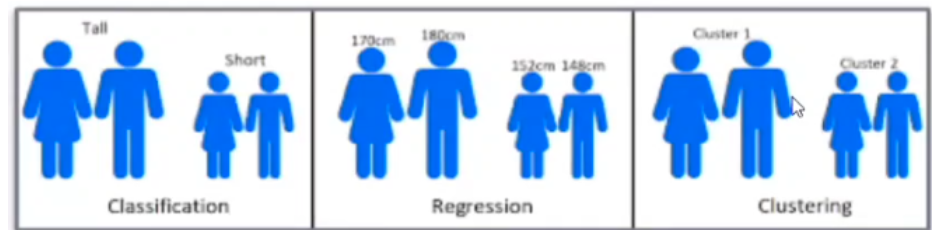

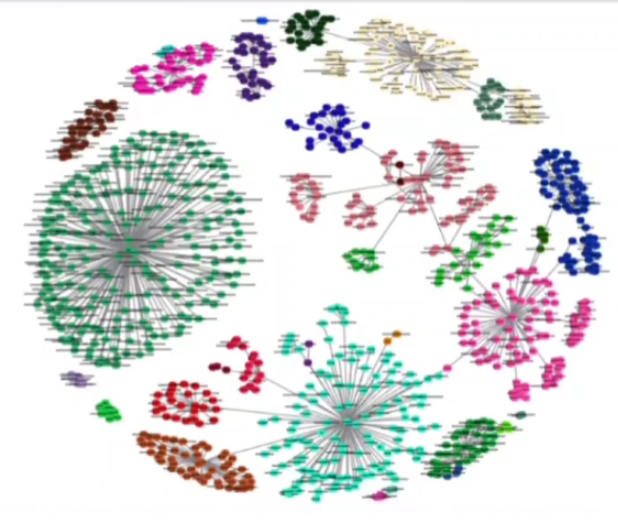

- unsupervised, pattern leri yakalar
- 
Kümelemede domain knowledge çok önemlidir-- 
tecrübeye dayalı kümeleme matematiki sonuçtan daha önemlidir - .
unsupervised da sonuçlar tartışmaya açıktır. kesin değildir..

https://www.naftaliharris.com/blog/visualizing-k-means-clustering/

Centroid atama için simulasyon sayfası.. --> Randomly --> Gaussian

### Import Libraries

In [1]:
# pip install sklearn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# from sklearn.preprocessing import StandardScaler
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings('ignore')
#pd.set_option('display.max_rows', 500)

* Irıs data setini çalışacağız
* İris Çiçekleri'nin üç türünün ( Setosa,  Virginica ve  Versicolor) her birinden 50 örnekten oluşur.
* Her numuneden ölçülen dört özellik, santimetre cinsinden çanak yaprağı uzunluğu, çanak yaprağı genişliği, taç yaprağı uzunluğu ve taç yaprağı genişliğidir .

** Unsupervised learningde model eğitim yapmaz. VErilen data setinden benzer pattern'leri kullanarak clustering yapar.

In [3]:
df = pd.read_csv("iris.csv")
df.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

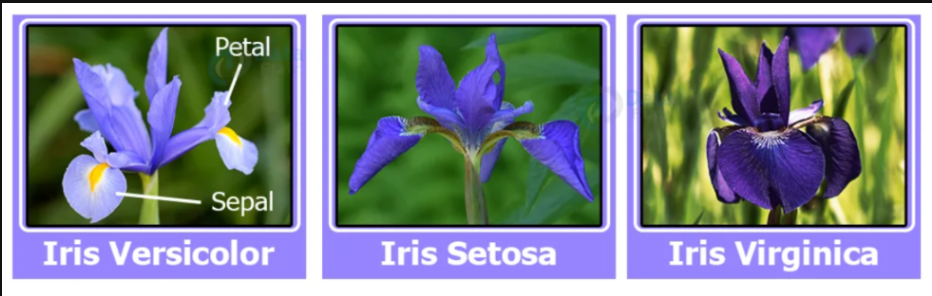

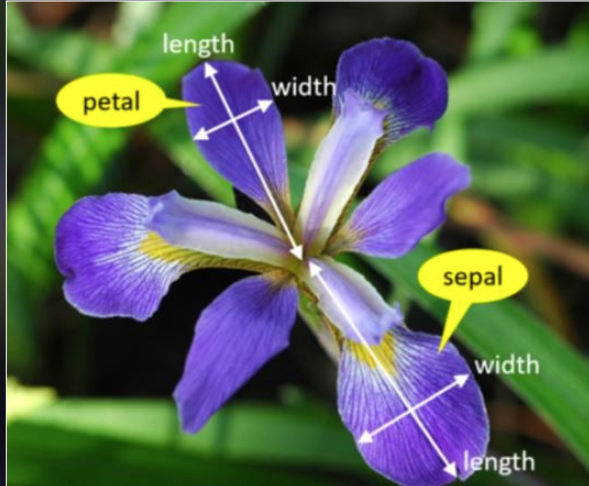

Sepal Length (Çanak Yaprağı Uzunluğu): Çanak yaprağının uzunluğunu santimetre cinsinden gösterir.

Sepal Width (Çanak Yaprağı Genişliği): Çanak yaprağının genişliğini santimetre cinsinden gösterir.

Petal Length (Taç Yaprağı Uzunluğu): Taç yaprağının uzunluğunu santimetre cinsinden gösterir.

Petal Width (Taç Yaprağı Genişliği): Taç yaprağının genişliğini santimetre cinsinden gösterir.

data setindeki tüm değerler cm cinsinden verilmiş. 

In [4]:
df.species.value_counts()   # her bir tür için sayılarına bakalım

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [5]:
df.info()

# null value yok

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.describe().T

count      mean       std  min  25%   50%  75%  max
sepal_length  150.0  5.843333  0.828066  4.3  5.1  5.80  6.4  7.9
sepal_width   150.0  3.057333  0.435866  2.0  2.8  3.00  3.3  4.4
petal_length  150.0  3.758000  1.765298  1.0  1.6  4.35  5.1  6.9
petal_width   150.0  1.199333  0.762238  0.1  0.3  1.30  1.8  2.5

Data setindeki tüm değerler cm cinsinden verilmiş

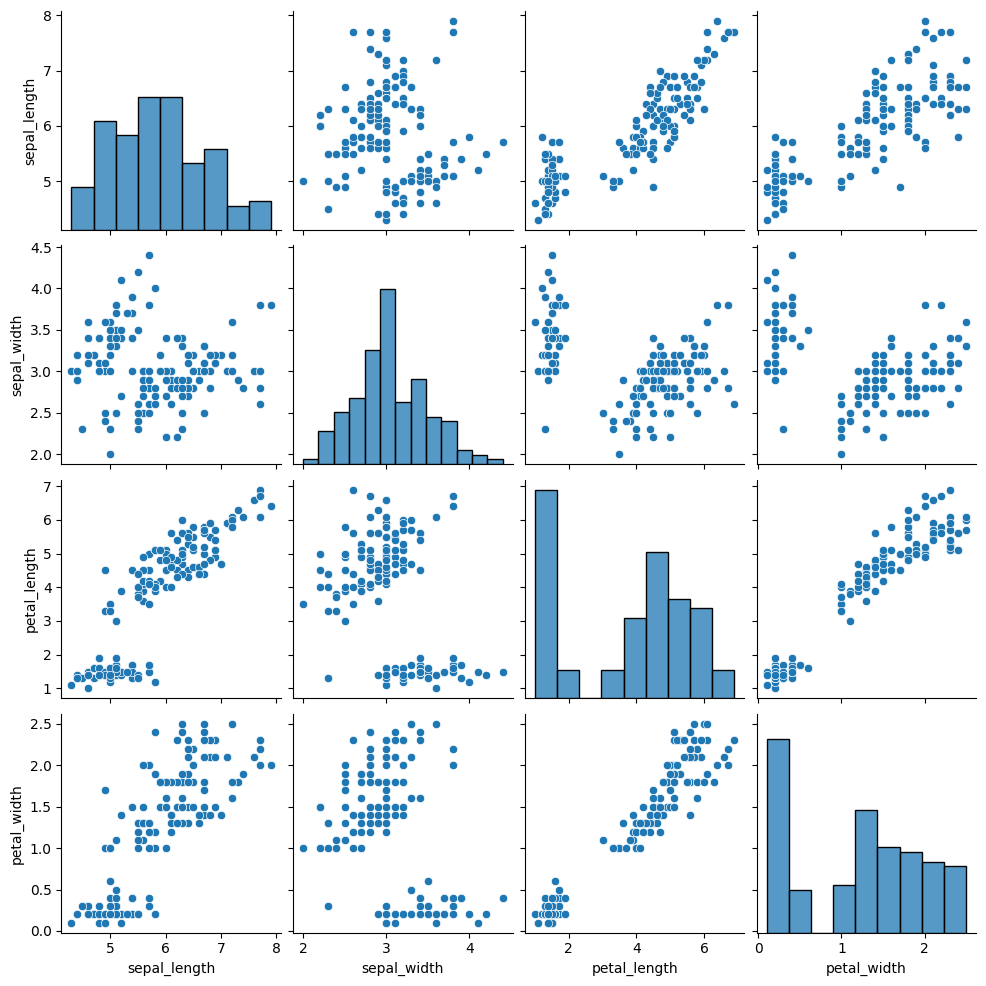

In [7]:
sns.pairplot(df)
plt.show();

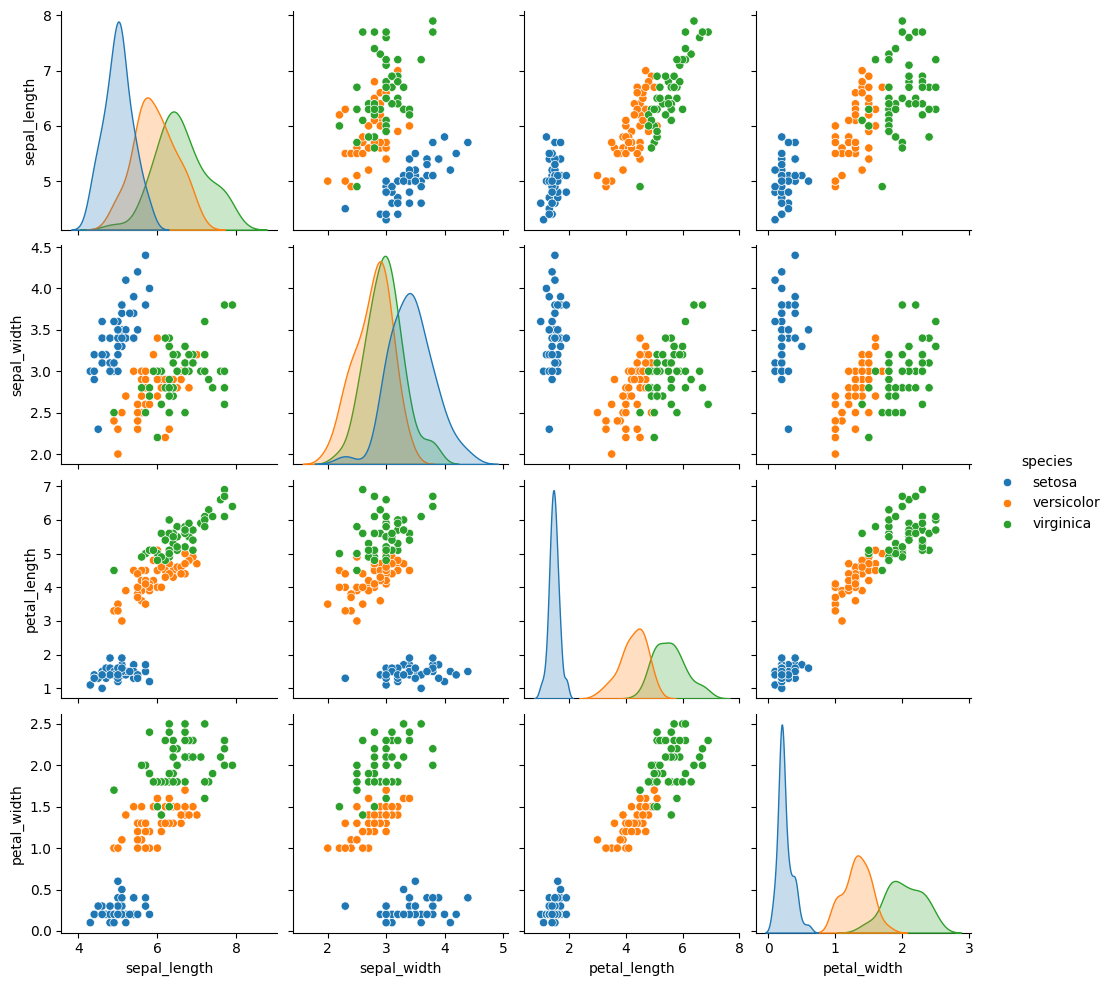

In [8]:
sns.pairplot(data=df, hue='species')
plt.show();

Setosa Türü Ayrımı: Setosa türü diğerlerinden belirgin bir şekilde ayrılıyor. Özellikle petal length ve petal width özelliklerinde bu tür, Versicolor ve Virginica'ya göre daha küçük değerlere sahip. Bu, bu özelliklerin Setosa türünü diğerlerinden ayırmak için iyi birer gösterge olduğunu belirtir.

Versicolor ve Virginica Karşılaştırması: Versicolor ve Virginica türleri birbirine daha yakın, ancak yine de belirli özelliklerde farklılıklar gözlemlenebilir. Örneğin, petal length ve petal width değerlerinde Virginica, genellikle Versicolor'dan daha büyük değerlere sahiptir.

## Scaling Data

K means algoritmasında mutlaka scale gerekir. Scale edilmiş datayı tekrar scale yapmak uygun olmaz K-means algoritması, verilerin ölçeklenmesine duyarlıdır çünkü öklidyen mesafeye dayanır. Bu nedenle, Feature'ların değer aralıkları birbirinden farklıysa, ölçeklendirme genellikle algoritmanın daha iyi sonuçlar vermesine yardımcı olur. K-Means algoritmasında verilerin ölçeklendirilmesi (scaling) önemlidir. K-Means, feature'lar  arasındaki uzaklıkları kullanarak kümeleri belirler. Eğer farklı feature'lar farklı ölçeklerde ise (örneğin, bir özellik milyonlarla ifade edilirken diğeri 0 ile 1 arasında değişiyorsa), algoritma yanıltıcı sonuçlar verebilir. Feature'lar  arasındaki bu ölçek farklılıkları, K-Means'ın kümeleme sürecini bozabilir.

Bu yüzden, ölçeklendirme yapmanın veri kümeniz için uygun olup olmadığını belirlemek için her iki durumu (ölçekli ve ölçeksiz) denemeniz önerilir. Elde edilen kümelerin kalitesini ve algoritmanın performansını değerlendirerek hangi yöntemin daha iyi çalıştığına karar vermelisiniz.

In [9]:
# Eğer Scale yapsaydık alttaki gibi olabilirdi: 

# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler() 

# Iris_scaled = scaler.fit_transform(Iris)   # fit_transform

NOT-1: bu NB' da scale yapılmadan devam edildi. Çünkü scale yapılarak elde edilen sonuçların daha kötü olduğu izlendi. Feature lar cm cinsinden olduğu için boylke bir sonuç alınmış olaiblir

NOT-2: burada train ve test split yapmayacağız. doğrudan X'i oluşturacağız. Target variable olmadığı için datanın hepsini X' atayacağız

## K_Means Clustering

**KMeans'de işlem sıralaması**

Veri ile alakalı ön işlemler (missing, value, outlier - ) 

Hopkins Testi (data setim kümelemeye uygun mu değil mi) 
Bu testin sonucu, veri setinin kümelenme için uygun olup olmadığını gösterir. Eğer test sonucu düşük bir değer (genellikle 0.5'in altında) veriyorsa, veri setinde anlamlı kümelerin var olduğuna işaret eder ve kümelenme algoritmalarının kullanımı için uygun bir göstergedir. Yüksek bir değer (0.5'e yakın veya daha yüksek), verilerin rastgele veya düzgün dağıldığını ve belirgin kümelerin olmadığını gösteri- r.

Optimum cluster sayısını bulmak. Ya domain knowledge ile bakarım yada alttaki metotları uygularım (Elbow, Silhouette- ...)

Cluster işleminin kalite kontrolü (ARI-Rand Index)

In [10]:
#  Eksik veri kontrolü için
# missing_values = iris_data.isnull().sum()

# missing_values

In [11]:
Z =df.copy()     # orjinalini muhafaz edip daha sonra kullanma ihtimali nedeniyle saklayalım

In [12]:
Z.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [13]:
X = Z.drop("species", axis=1)   # species feature'ı düşürelim

In [14]:
X.head()

sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2

In [15]:
X.shape

(150, 4)

In [16]:
from sklearn.cluster import KMeans

In [17]:
K_means_model = KMeans(n_clusters=5, random_state=42)

# n_clusters: Küme sayısı demektir

default değerler:

init='k-means++',
    n_init=10,
    max_iter=300,
    tol=0.0001,
    verbose=0,
    random_state=None,
    copy_x=True,
    algorithm='lloyd',

**NOT**: K-Means de fit ve predict genelde beraber kullanılır. **Fit denildiğinnde patternleri yakalayıp centroid leri oluşturur**, predict deyince veri noktalarını en yakın kümelerine atama yapar.

In [18]:
K_means_model.fit_predict(X)   # burada hem fit hem de predict bir arada kullanılıyor

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0,
       2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 0,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 4, 0, 3, 4, 4, 3, 2, 3, 4, 3,
       4, 4, 4, 0, 4, 4, 4, 3, 3, 0, 4, 0, 3, 0, 4, 3, 0, 0, 4, 3, 3, 3,
       4, 0, 0, 3, 4, 4, 0, 4, 4, 4, 0, 4, 4, 4, 0, 4, 4, 0])

**Sonuç**: fit_predict metodu, her veri noktasının ait olduğu kümenin etiketini içeren bir dizi döndürür. Bu etiketler genellikle 0'dan başlayarak "n_clusters-1'"e kadar olan tam sayılardır.

In [19]:
# fit ve predict i ayrı ayrı kullanırsak:

K_means_model.fit(X)   # eger fit i ayrı verirsek hem bu satır hem alttaki satır yazılacak

KMeans(n_clusters=5, random_state=42)

In [20]:
K_means_model.labels_ 

# Fit ayrı yapılınca bu satır predict olarak çalışmış olacak

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0,
       2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 0,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 4, 0, 3, 4, 4, 3, 2, 3, 4, 3,
       4, 4, 4, 0, 4, 4, 4, 3, 3, 0, 4, 0, 3, 0, 4, 3, 0, 0, 4, 3, 3, 3,
       4, 0, 0, 3, 4, 4, 0, 4, 4, 4, 0, 4, 4, 4, 0, 4, 4, 0])

In [21]:
X["Classes"] = K_means_model.labels_    # yukardaki label'ları Classes' a atayalım
X

sepal_length  sepal_width  petal_length  petal_width  Classes
0             5.1          3.5           1.4          0.2        1
1             4.9          3.0           1.4          0.2        1
2             4.7          3.2           1.3          0.2        1
3             4.6          3.1           1.5          0.2        1
4             5.0          3.6           1.4          0.2        1
..            ...          ...           ...          ...      ...
145           6.7          3.0           5.2          2.3        4
146           6.3          2.5           5.0          1.9        0
147           6.5          3.0           5.2          2.0        4
148           6.2          3.4           5.4          2.3        4
149           5.9          3.0           5.1          1.8        0

[150 rows x 5 columns]

**NOT**: yukardaki işlemlerde n_cluster=5 alarak ve default parametreleri kullanarak KMeans clusterlar oluşturduk. Fakat modeklin başarılı olup olmadığını şu an bilmiyoruz... Bunun için uzman birisinin Iris data setiyle alakalı Cluster önerisinden bulunması gerekir

------------------------------------------------

## Hopkins test

Hopkins testi, bir veri setinin kümeleme eğilimini ölçmek için kullanılan bir istatistiksel testtir. Bu test, veri setinin ne kadar iyi kümelemeye uygun olduğunu veya veri setindeki örneklerin ne kadar rastgele dağıldığını belirlemeye yardımcı olur. K-Means gibi kümeleme algoritmaları öncesinde veri setinin bu analizini yapmak, algoritmanın etkinliğini değerlendirmek için önemlidir. Hopkins istatistiği, 0 ile 1 arasında bir değer alır. **0.5 in altı kabul edileblir olup 0.3 den az olması istenen bir durumdur**

Hopkins test adım adım basit bir açıklama:

Örneklem Seçimi: Öncelikle, veri setinizden rastgele seçilmiş bir grup nokta alırsınız. Bu, testin temelini oluşturur.

En Yakın Komşu Mesafeleri: Bu örneklemdeki her bir nokta için, veri setindeki en yakın komşusuna olan mesafeyi hesaplarsınız. Bu, veri setinizdeki noktaların birbirine ne kadar yakın olduğunu gösterir.

Rastgele Noktalar Üretimi: Ardından, veri setinizin aynı boyutlarına sahip rastgele noktalar üretirsiniz. Bu, tamamen rastgele bir dağılımın nasıl olacağını temsil eder.

Rastgele Noktaların En Yakın Komşu Mesafeleri: Üretilen bu rastgele noktalar için de, veri setinizdeki en yakın komşuya olan mesafeleri hesaplarsınız.

Skor Hesaplama: Son olarak, veri setinizdeki gerçek noktaların en yakın komşu mesafelerinin toplamı ile rastgele noktaların en yakın komşu mesafelerinin toplamını karşılaştırarak bir skor hesaplarsınız. Bu skor, 0 ile 1 arasında bir değerdir.

Eğer skor 0.5 civarında ise, veri setinizin rastgele dağıldığı anlamına gelir; yani belirgin bir kümeleme eğilimi yoktur. Eğer skor 0'a yakınsa, veri setinizin güçlü bir kümeleme eğilimi gösterdiği anlamına gelir.

In [22]:
# Hatalı kütüphane !!

# pip install pyclustertend  
#  from pyclustertend import hopkins 

In [23]:
X = X.drop("Classes", axis=1)  # yukarda ornek olarak tahmin edilen degerleri yine devre dışı bıraktık
X

sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]

In [24]:
# alttaki kod blogu manuel olarak Hopkins test skorunu hesaplayacak
# 0' a yakın olması daha iyi kümeleme göstergesi olacaktır

In [25]:
from sklearn.neighbors import BallTree  # BallTree, veri noktaları arasındaki uzaklık sorgularını hızlı bir şekilde gerçekleştirmek için kullanılan bir veri yapısıdır. 
import numpy as np
import pandas as pd
def hopkins(data_frame, sampling_size):
    """Assess the clusterability of a dataset. A score between 0 and 1, a score around 0.5 express
    no clusterability and a score tending to 0 express a high cluster tendency.
    Parameters
    ----------
    data_frame : numpy array
        The input dataset
    sampling_size : int
        The sampling size which is used to evaluate the number of DataFrame.
    Returns
    ---------------------
    score : float
        The hopkins score of the dataset (between 0 and 1)
    Examples
    --------
    >>> from sklearn import datasets
    >>> from pyclustertend import hopkins
    >>> X = datasets.load_iris().data
    >>> hopkins(X,150)
    0.16
    """
    if type(data_frame) == np.ndarray:
        data_frame = pd.DataFrame(data_frame)
    # Sample n observations from D : P
    if sampling_size > data_frame.shape[0]:
        raise Exception(
            'The number of sample of sample is bigger than the shape of D')
    data_frame_sample = data_frame.sample(n=sampling_size)
    # Get the distance to their neirest neighbors in D : X
    tree = BallTree(data_frame, leaf_size=2)
    dist, _ = tree.query(data_frame_sample, k=2)
    data_frame_sample_distances_to_nearest_neighbours = dist[:, 1]
    # Randomly simulate n points with the same variation as in D : Q.
    max_data_frame = data_frame.max()
    min_data_frame = data_frame.min()
    uniformly_selected_values_0 = np.random.uniform(min_data_frame[0], max_data_frame[0], sampling_size)
    uniformly_selected_values_1 = np.random.uniform(min_data_frame[1], max_data_frame[1], sampling_size)
    uniformly_selected_observations = np.column_stack((uniformly_selected_values_0, uniformly_selected_values_1))
    if len(max_data_frame) >= 2:
        for i in range(2, len(max_data_frame)):
            uniformly_selected_values_i = np.random.uniform(min_data_frame[i], max_data_frame[i], sampling_size)
            to_stack = (uniformly_selected_observations, uniformly_selected_values_i)
            uniformly_selected_observations = np.column_stack(to_stack)
    uniformly_selected_observations_df = pd.DataFrame(uniformly_selected_observations)
    # Get the distance to their neirest neighbors in D : Y
    tree = BallTree(data_frame, leaf_size=2)
    dist, _ = tree.query(uniformly_selected_observations_df, k=1)
    uniformly_df_distances_to_nearest_neighbours = dist
    # return the hopkins score
    x = sum(data_frame_sample_distances_to_nearest_neighbours)
    y = sum(uniformly_df_distances_to_nearest_neighbours)
    if x + y == 0:
        raise Exception('The denominator of the hopkins statistics is null')
    return x / (x + y)[0]


alttaki kod ile fonksiyon veri setinin tamamını kullanarak Hopkins istatistiğini hesaplayacaktır. Bu, genellikle büyük veri setleri için zaman alıcı olabilir ve veri setinin yapısını tam olarak yansıtan bir örneklem oluşturmayabilir. Kümeleme eğilimini daha hızlı ve etkili bir şekilde değerlendirmek için genellikle veri setinin bir alt kümesi örneklem olarak kullanılır.

X.shape[0] ifadesi X'in satır sayısını verir. Bu durumda, X veri setinin tamamı örneklem olarak kullanılır.

In [26]:
hopkins(X,X.shape[0])  # büyük datalarda %10-20 gibi alınaiblir (örnek olarak 150 bimlik datada)

0.16761219357997525

In [27]:
hopkins(X, 60) # 60 adet gözlem için baktım skorlar yakın. Her çalışmada değişir ama çok büyük fark çıkmaz

0.17413794812981764

NOT: 0.30 un altında olması iyi bir kümeleme olabileceğini söylüyor

buraya kadar default değerler üzerinden model kurduk, buna uygun kümeleme yaptık, skor alık. Küme sayımız = 5 olarak yapmıştık

şimdi ise optimum küme sayısını bulacağımız metotları uygulayalım

# Choosing The Optimal Number of Clusters

Eğer bir domain knowledge yoksa nasıl yapacağız?.Matematik yöntemler kullanmak gerekecek.. Elbow gibi..

## Elbow metod

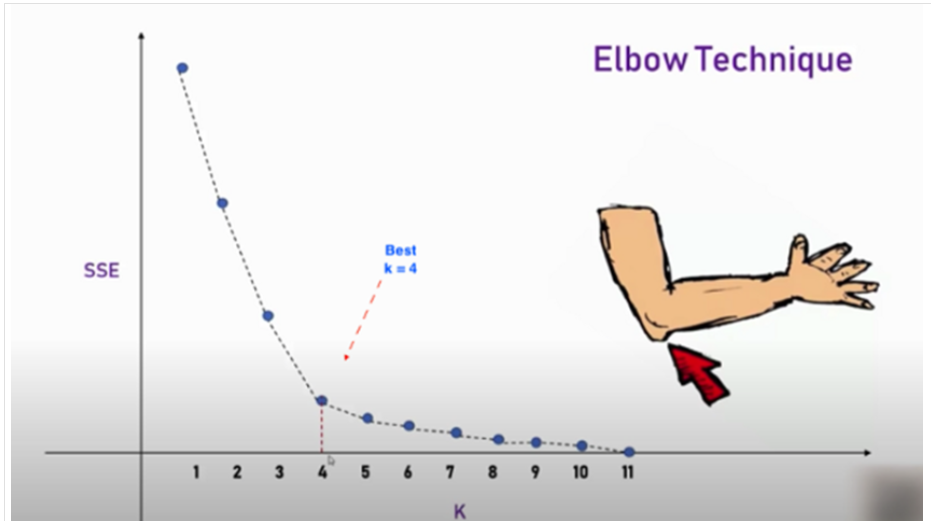

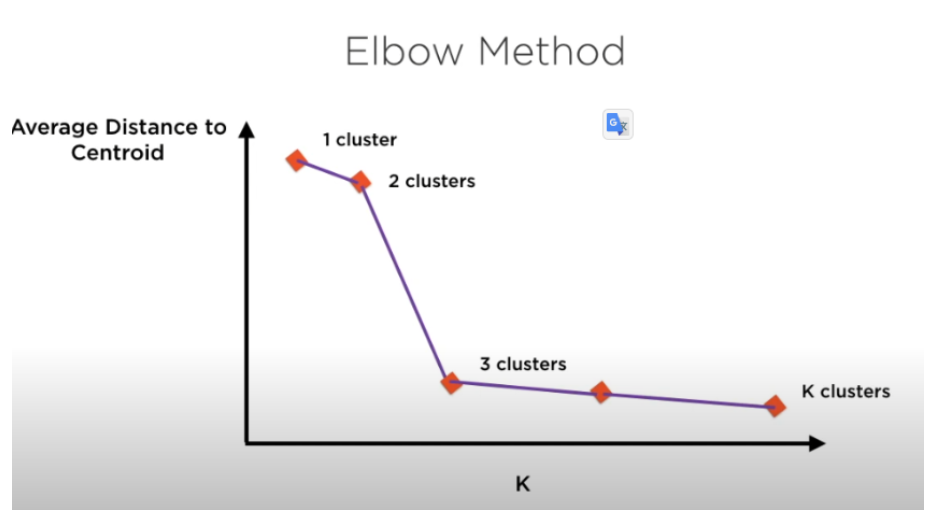

bu metodun temelinde "inertia" kavramı vardır. Inertia, veri setindeki her noktanın, o noktanın ait olduğu kümenin merkezine olan mesafelerinin karelerinin toplamıdır. Başka bir deyişle, inertia, kümeler içindeki varyansın bir ölçüsüdür. Düşük bir inertia değeri, küme içindeki noktaların merkeze daha yakın olduğunu ve dolayısıyla kümelerin daha sıkı olduğunu gösterir. Bu, genellikle daha iyi bir kümeleme performansı anlamına gelir.

SSD: K-Means modelinin her küme içindeki noktaların kümelerinin merkezine olan mesafelerinin karelerinin toplamını ifade eder.

In [28]:
ssd = []    # inertia  .. SSD, "Sum of Squared Distances" (mesafelerin karelerinin toplamı)

K = range(2,10)   # minimum 2 küme ile başladık

for k in K:                                          # Her bir farklı küme sayısı için K-Means modelini oluşturur ve eğitir.
    model = KMeans(n_clusters =k, random_state=42)
    model.fit(X)
    ssd.append(model.inertia_)

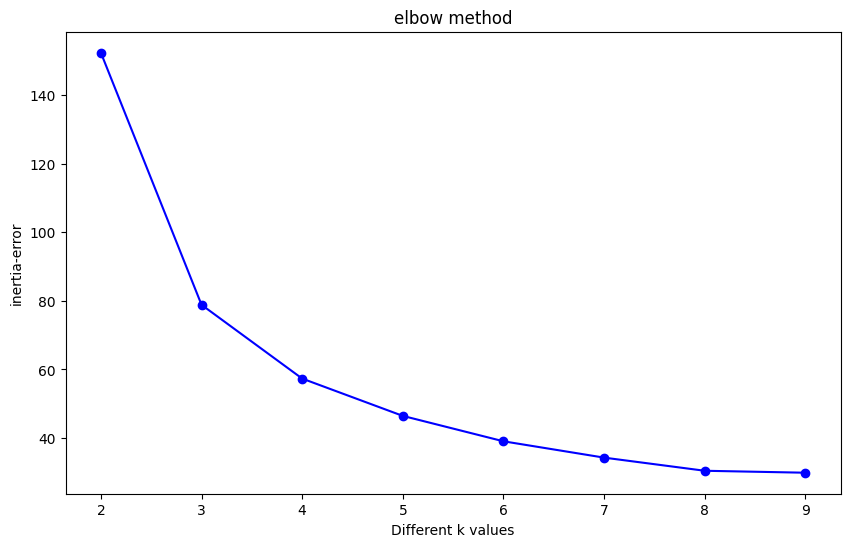

In [29]:
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method") 
plt.show()

Burada ilk keskin düşüşün 3 te olduğu görülüyor. Fakjat bunu rakamsal olarak bar chart üzerinden de görelim

In [30]:
ssd    # yukarda hesaplanmıştı..  sum of sqaured distance

[152.34795176035792,
 78.85566582597731,
 57.35088021295475,
 46.47223015873016,
 39.066035353535355,
 34.3058152958153,
 30.476222943722945,
 29.906246659137963]

In [31]:
pd.Series(ssd).diff()

# ilk satır 0 çünkü "152 - hiçbirşey"
# en büyük düşüşü arıyoruz

0          NaN
1   -73.492286
2   -21.504786
3   -10.878650
4    -7.406195
5    -4.760220
6    -3.829592
7    -0.569976
dtype: float64

In [32]:
# yukardaki değerleri dataframe e dönüştürelim

df_diff =pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df_diff

0
1        NaN
2  73.492286
3  21.504786
4  10.878650
5   7.406195
6   4.760220
7   3.829592
8   0.569976

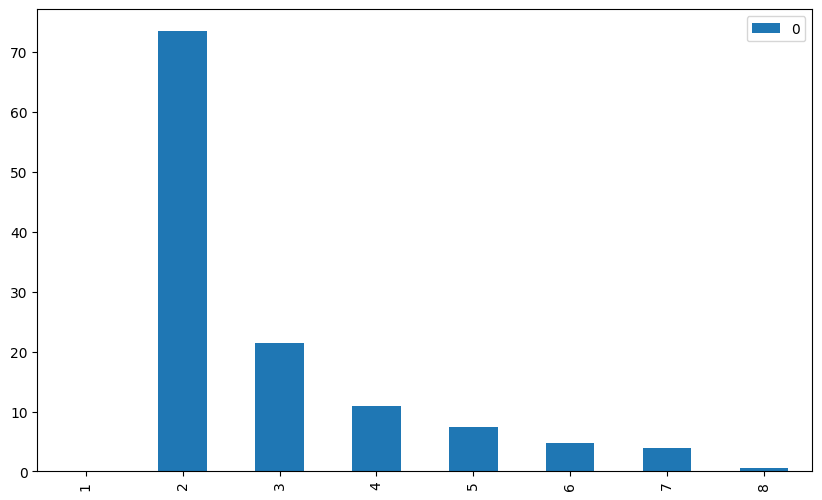

In [33]:
df_diff.plot(kind='bar');    # alttaki grafiğe göre en sert düşüş noktasını görelim


NOT: en sert düşüşün 3 de olduğu görülüyor. Fakat yellowbrik üzerinden de bunu teyit etmeye çalışacağız..

## Second Method - Yellowbrick (n_cluster selection)

In [34]:
# pip install yellowbrick

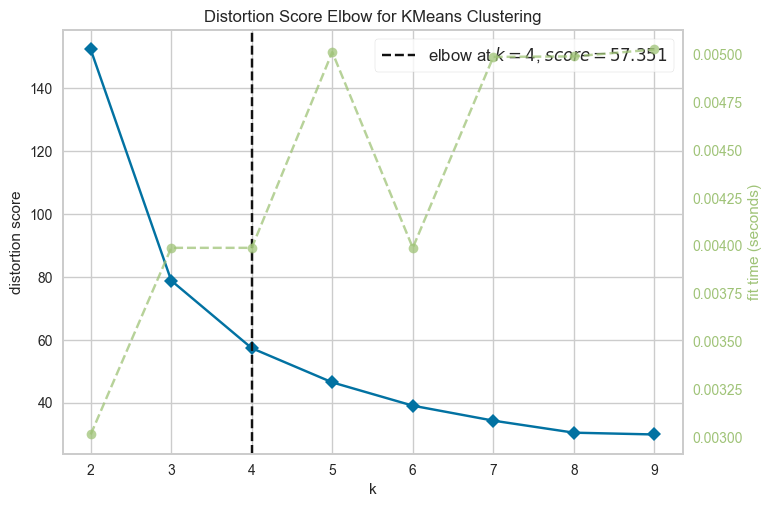

In [35]:
from yellowbrick.cluster import KElbowVisualizer   # yellowbrick ile elbow daki grafikte seçim yapar

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,10)) # algoritmanın 2 ile 10 arasındaki her küme sayısı için modeli değerlendireceği anlamına gelir.

visualizer.fit(X)        # Fit the data to the visualizer.. inertia metoduna ggöre gösterir
visualizer.show();

## Silhouette analysis

Kümelemede 2 öneml, kriter: 1. Küme içi elemanların birbirine yakın olması (eleman mesafelerinin minimum olması) 2. Kümelerin birbirinden uzak olması (küme merkezlerinin birbirine mesafesninin max olması)

Silhouette analizi, kümeleme performansını değerlendirmek için kullanılan bir metriktir. Küme içi benzerliği ve kümeler arası benzerliği karşılaştırarak, kümelerin ne kadar iyi ayrıldığını gösterir. Silhouette değeri, her veri noktası için hesaplanır ve bu değerlerin ortalaması alınarak genel bir kümeleme kalitesi ölçümü elde edilir. Siluet puanı Minkowski mesafesini veya Öklid mesafesini kullanır ve değeri [-1, 1] arasında değişir

Silhouette değeri -1 ile 1 arasında değişir:

1: i veri noktası kendi kümesinde iyi yerleştirilmiş ve diğer kümelerden uzakta demektir.

0: i veri noktası iki küme arasında bir sınıra yakın demektir.

−1: i veri noktası yanlış bir kümeye atanmış demektir.

bu değerlerin "eşik" değerleri kesin bir şekilde belirlenmemiştir. Ancak, pratikte, ortalama silhouette değerinin yüksek olması (genellikle 0.5'ten büyük) kümelenmenin iyi olduğunu gösterirken, düşük değerler (genellikle 0.25'ten düşük) kümelenmenin iyi olmadığını veya daha iyi yapılabileceğini gösterebilir.

In [36]:
from sklearn.metrics import silhouette_score

In [37]:
silhouette_score(X, K_means_model.labels_)   # yukarda default olarak n_cluster =5 seçilmişti

0.4930804067193529

In [38]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.6810461692117465
For n_clusters=3, the silhouette score is 0.5511916046195927
For n_clusters=4, the silhouette score is 0.49764331793219296
For n_clusters=5, the silhouette score is 0.4930804067193529
For n_clusters=6, the silhouette score is 0.36784649847122536
For n_clusters=7, the silhouette score is 0.3542978877198859
For n_clusters=8, the silhouette score is 0.34467972180562056


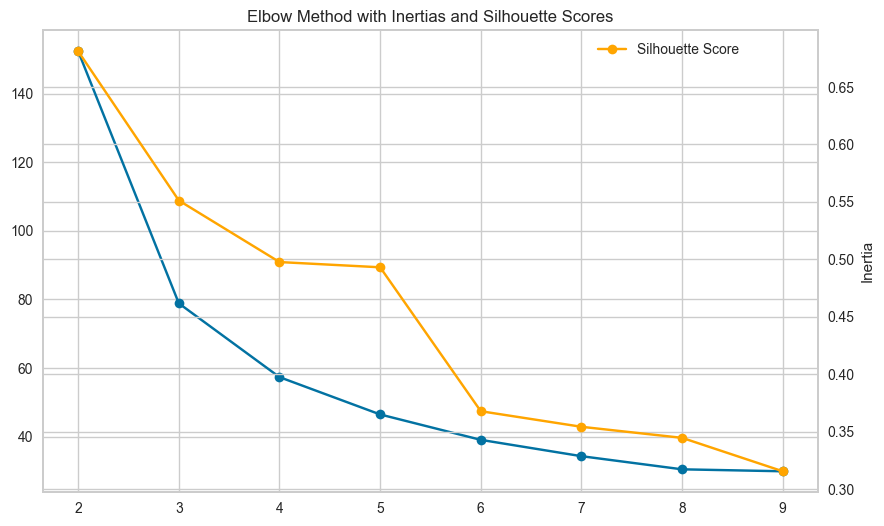

In [39]:
# Elbow ve Silhoutee skorunu bir arada gösteren grafik

inertia_scores = []
silhouette_scores = []
for i in range(2, 10):
    model = KMeans(n_clusters=i, random_state=42)
    labels = model.fit_predict(X)
    silhouette = silhouette_score(X, labels)
    inertia = model.inertia_
    inertia_scores.append(inertia)
    silhouette_scores.append(silhouette)
# Plotting the Elbow Method with Inertias and Silhouette Scores
plt.figure(figsize=(10, 6))
# Plot Inertias
plt.plot(range(2,10), inertia_scores, label='Inertia', marker='o')
# Plot Silhouette Scores on a secondary y-axis
plt.twinx()
plt.plot(range(2,10), silhouette_scores, label='Silhouette Score', marker='o', color='orange')
# Add labels, title, and legend
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method with Inertias and Silhouette Scores')
plt.legend(loc='upper left', bbox_to_anchor=(0.7, 1))
plt.show()

yukardaki grafikten en iyi dengenin 3 de oldugunu ifade edebiliriz

## Silhouette Visualizer

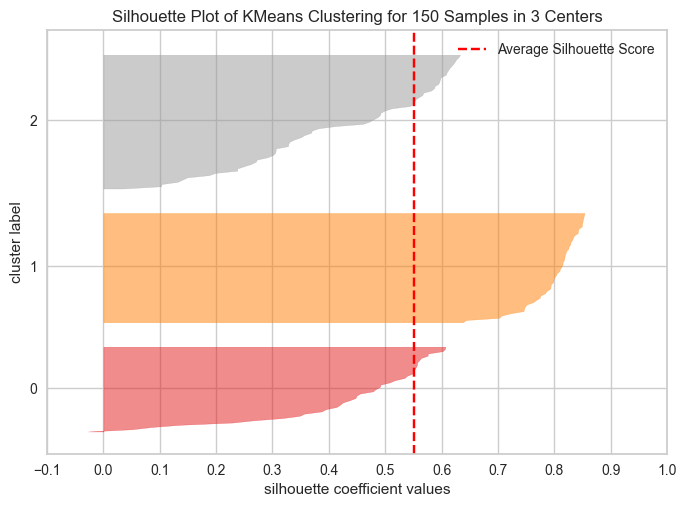

In [40]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model3 = KMeans(n_clusters=3, random_state=42)  # kmeans = 3 olarak seçtik ve ona göre çizim yaptı
visualizer = SilhouetteVisualizer(model3)

visualizer.fit(X)    # Fit the data to the visualizer
visualizer.poof();

**Önemli NOT**: farklı değerler çıkarsa, elbow da çıkan küme sayısınını ( burada 3) silhouette skoruna bakın. (For n_clusters=3, the silhouette score is 0.5528190123564102) burada 0.55 çıkmış. eğer bu değer 0.50 nin üzerinde ise o zaman elbow daki Inertia değerini alaiblirsiniz.. burada elbow 3 demişken yellowbrick 4 demişti..hangisini alcağız ? slhoutee eğer elbow un önerdiği değeri 0.5 den büyük skor verirse o zaman elbow inertia yı alablirsiniz..

N_cluster saısı ve Silhouette Visualizer görselleri arasındaki lişikiyi anlamak için alttaki sayfaya bakınız https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

**SilhouetteVisualizer'ı yorumlarken dikkat edilmesi gerekenler:**

Geniş siluetler (1'e yakın değerler) iyi bir kümeleme performansını gösterir.

Dar veya negatif değerlere sahip siluetler, bu veri noktalarının muhtemelen yanlış kümeye atandığını gösterir.

Eğer birçok veri noktası ortalama siluet skorunun (kırmızı kesikli çizgi) altındaysa, bu küme sayısının gözden geçirilmesi gerektiğini gösterebilir.

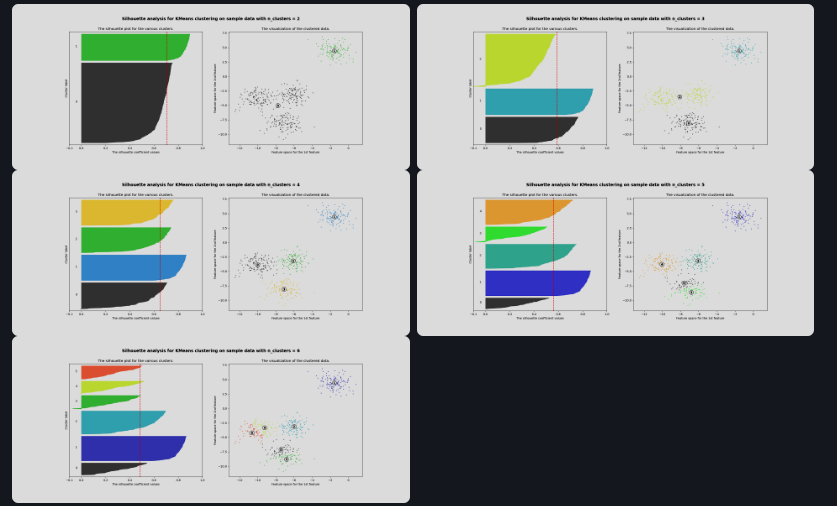

## Building the model based on the optimal number of clusters

In [41]:
# n_cluster olarak 3 sayısına karar verdim ve onunla yürüyeceğim

In [42]:
model = KMeans(n_clusters =3, random_state=42)
model.fit_predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [43]:
model.labels_    # n_cluster= 3 için yapılan atama (predict) sonuçları

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [44]:
clusters = model.labels_

In [45]:
X.head()

sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2

In [46]:
X["predicted_clusters"] = clusters

In [47]:
X   # burada predicted olan feature içinde tahmin sonuçları görülüyor

sepal_length  sepal_width  petal_length  petal_width  predicted_clusters
0             5.1          3.5           1.4          0.2                   1
1             4.9          3.0           1.4          0.2                   1
2             4.7          3.2           1.3          0.2                   1
3             4.6          3.1           1.5          0.2                   1
4             5.0          3.6           1.4          0.2                   1
..            ...          ...           ...          ...                 ...
145           6.7          3.0           5.2          2.3                   0
146           6.3          2.5           5.0          1.9                   2
147           6.5          3.0           5.2          2.0                   0
148           6.2          3.4           5.4          2.3                   0
149           5.9          3.0           5.1          1.8                   2

[150 rows x 5 columns]

- Eğer Uzman görüşüne sahip olmasa idik, Normal şartlarda NB burada bitmiş idi..
- bundan sonraki aşama uzman görüşünü almak olmalıdır.

Şimdi senaryo gereği uzman görüşü olarak iris data setinin species feature 'ı çağırıyorum..

In [48]:
# orjinal data setini çağıralım

df.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [49]:
df["predicted_clusters"] = clusters

In [50]:
df.head()   # species feature'ı bize uzman gorusunu temsil ediyor

sepal_length  sepal_width  petal_length  petal_width species  \
0           5.1          3.5           1.4          0.2  setosa   
1           4.9          3.0           1.4          0.2  setosa   
2           4.7          3.2           1.3          0.2  setosa   
3           4.6          3.1           1.5          0.2  setosa   
4           5.0          3.6           1.4          0.2  setosa   

   predicted_clusters  
0                   1  
1                   1  
2                   1  
3                   1  
4                   1

In [51]:
# Yaptıgımız kumelenin ne kadar dogru oldugunu pandas daki crosstab fonksiyonu ile görelım
# crosstab : bir veri çerçevesi (df) içindeki iki sütun arasında bir çapraz tablo (contingency table) oluşturur.

In [52]:
ct = pd.crosstab(df.predicted_clusters, df.species) # ayrılan class'lara göre tahmin ve labels karşılaştırıyor.
ct

species             setosa  versicolor  virginica
predicted_clusters                               
0                        0           3         36
1                       50           0          0
2                        0          47         14

In [53]:
# 2. clusters 47 versicolor ve 14 virginica tahmin etmiş
# 1.   ''     50 setosa  tahmin etmiş 0 hata
# 0.   ''     36 virginica  ve 3 versicolor tahmin etmiş
# toplamda 17 hata yapmış

## Adjust Rand Score

Rand Index (Rand score), kümeleme algoritmasının performansını değerlendiren bir metriktir. Özellikle, iki farklı veri kümesi kümelemesinin - genellikle biri algoritma tarafından üretilen tahminler, diğeri ise gerçek etiketler - ne kadar benzer olduğunu ölçer

Rand Index değeri 0 ile 1 arasında değişir. 1, mükemmel bir eşleşmeyi gösterirken, 0 tamamen rastgele bir eşleşmeyi ifade eder. Yüksek bir Rand Index değeri, algoritmanın veri kümesini gerçek sınıflara yakın bir şekilde kümelediğini gösterir.

0.1 ve altı : Uyum yok zayıf uyum

0.1 - 03 : Düşük bir uyum

0.3 - 0.5 : Orta derece uyum

0.5 - 1.0 : İyi uyum

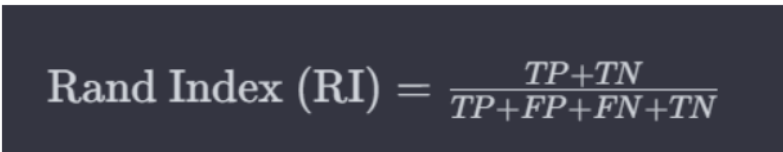

In [54]:
from sklearn.metrics import adjusted_rand_score

In [55]:
df_end = df
df_end

sepal_length  sepal_width  petal_length  petal_width    species  \
0             5.1          3.5           1.4          0.2     setosa   
1             4.9          3.0           1.4          0.2     setosa   
2             4.7          3.2           1.3          0.2     setosa   
3             4.6          3.1           1.5          0.2     setosa   
4             5.0          3.6           1.4          0.2     setosa   
..            ...          ...           ...          ...        ...   
145           6.7          3.0           5.2          2.3  virginica   
146           6.3          2.5           5.0          1.9  virginica   
147           6.5          3.0           5.2          2.0  virginica   
148           6.2          3.4           5.4          2.3  virginica   
149           5.9          3.0           5.1          1.8  virginica   

     predicted_clusters  
0                     1  
1                     1  
2                     1  
3                     1  
4                     1  
..                  ...  
145                   0  
146                   2  
147                   0  
148                   0  
149                   2  

[150 rows x 6 columns]

In [56]:
# adjusted_rand_score(labels_true, labels_pred)

# True_label lar uzman kişinin kümeleme sonuçlarını, pred_label lar bizim yaptıgımız kumelemeyi, gösterir

In [57]:
adjusted_rand_score(df_end.species, df_end.predicted_clusters)

0.7163421126838476

## Visualization Clusters

görselleştirmeyi benim modelimin tahmini üzerinden yapıyorum (predicted_clusters)

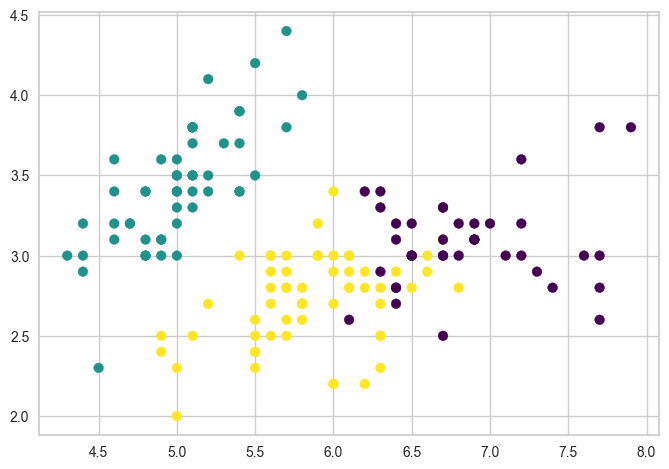

In [58]:
plt.scatter(X["sepal_length"], X["sepal_width"], c = X.predicted_clusters, cmap = "viridis");

# df["sepal_length"] : X ekseni değerleri.. çiçeklerin sepallerinin (çanak yapraklarının) uzunluklarını içerir.

# df["sepal_width"]: y ekseni değerleri ..sepal_width adlı sütununu temsil eder, sepallerin genişliklerini içerir.

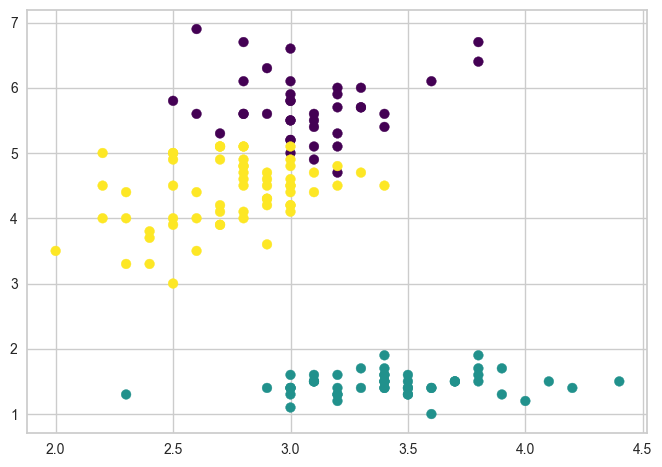

In [59]:
plt.scatter(X["sepal_width"], X["petal_length"], c = X.predicted_clusters, cmap = "viridis");
 # farklı bir eksen feature ları ,ile görelim

In [60]:
# her bir feature için centroid koordinatlarını bulalım..  Centroid lerin x,y koordinatları

centers = model.cluster_centers_
centers

array([[6.85384615, 3.07692308, 5.71538462, 2.05384615],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [5.88360656, 2.74098361, 4.38852459, 1.43442623]])

In [61]:
centers[:,0] # centers of sepal_length feature... Centroid lerin X koordinatları

array([6.85384615, 5.006     , 5.88360656])

In [62]:
centers[:,1] # centers of sepal_width feature ...  Centroid lerin Y koordinatları

array([3.07692308, 3.428     , 2.74098361])

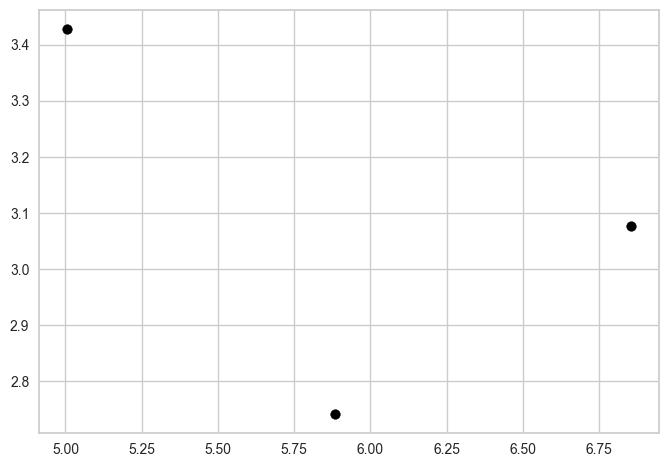

In [63]:
plt.scatter(centers[:,0], centers[:,1], c = "black");

# merkez noktalarını görelim çizimde

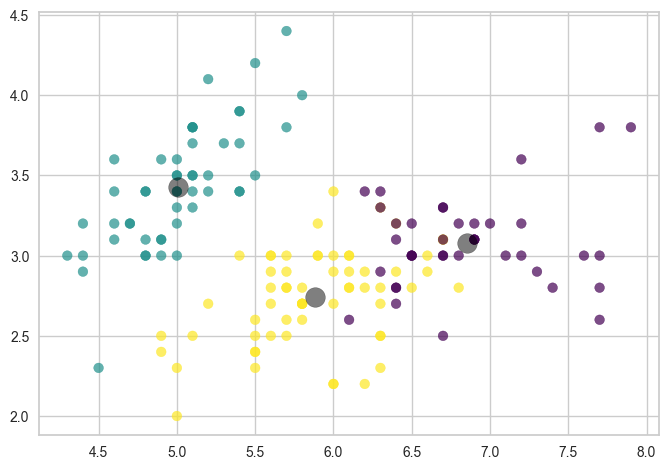

In [64]:
# üstteki grafikte görülen centroid noktalarına bizim data setimizdeki dta point'leri ekleyelim

plt.scatter(X["sepal_length"], X["sepal_width"], c = X.predicted_clusters, cmap = "viridis", alpha=0.7)
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5); 

## Remodeling according to discriminating features

In [ ]:
# Feature Engineering kapsamında modelimizi daha nasıl geliştirebiliriz ?  
#ayırt edici özelliklere göre yeniden modelleme yapalım. 17 adet hatalı kumelemeyi azaltmak için bu denemeyi yapıyorum

In [65]:
df.head()

sepal_length  sepal_width  petal_length  petal_width species  \
0           5.1          3.5           1.4          0.2  setosa   
1           4.9          3.0           1.4          0.2  setosa   
2           4.7          3.2           1.3          0.2  setosa   
3           4.6          3.1           1.5          0.2  setosa   
4           5.0          3.6           1.4          0.2  setosa   

   predicted_clusters  
0                   1  
1                   1  
2                   1  
3                   1  
4                   1

In [66]:
df.iloc[:, [0,1,2,3,5]].head()   # species ı devre dışı bırakalım

sepal_length  sepal_width  petal_length  petal_width  predicted_clusters
0           5.1          3.5           1.4          0.2                   1
1           4.9          3.0           1.4          0.2                   1
2           4.7          3.2           1.3          0.2                   1
3           4.6          3.1           1.5          0.2                   1
4           5.0          3.6           1.4          0.2                   1

In [67]:
# tüm feature' larımın tahmin ettiğim değerlere göre ortalamalarını alalım

clus_pred = df.iloc[:, [0,1,2,3,5]].groupby("predicted_clusters").mean().T
clus_pred

predicted_clusters         0      1         2
sepal_length        6.853846  5.006  5.883607
sepal_width         3.076923  3.428  2.740984
petal_length        5.715385  1.462  4.388525
petal_width         2.053846  0.246  1.434426

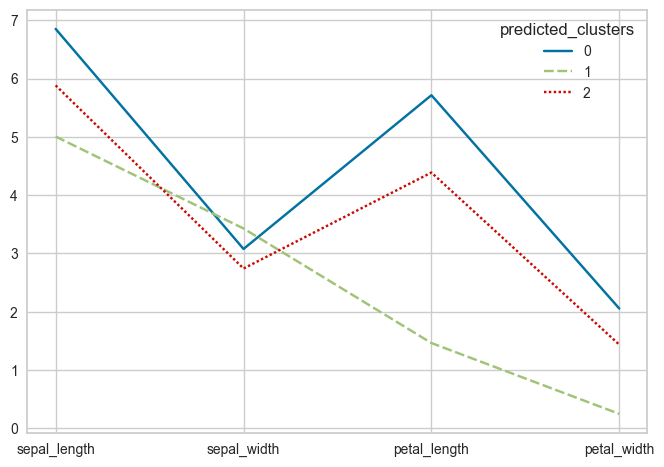

In [68]:
sns.lineplot(data = clus_pred);

üstteki grafikteki X eskeninde verilen değerlere göre sepal_width de birbirine yakınlık sözkonusu, petal_length de ise çok iyi ayrım oldugunu anlıyoruz.petal_width de de yine iyi ayrım sözkonusu..grafikler birbirinden uzakta, ayrım iyi yapılmış demektir bu.
ortalamalar birbirine yakın olunca iyi cluster lama olmuyor, ortalamalar birbirinden uzak olunca iyi cluster yapılmış demektir. bu grafikte ortalamaların birbirine mesafesi görülüyor

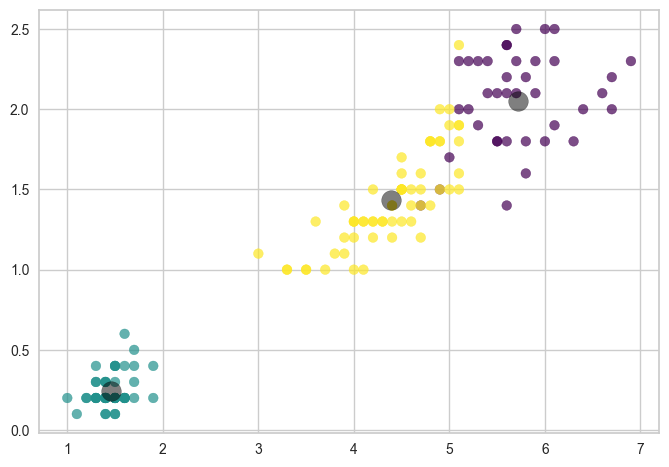

In [69]:
plt.scatter(X["petal_length"], X["petal_width"], c = X.predicted_clusters, cmap = "viridis", alpha =0.7)
plt.scatter(centers[:, 2], centers[:, 3], c='black', s=200, alpha=0.5)

**NOT**: bu iki fetaure (petal_length ve petal_width) üzerinden modeli yeniden kurup birde bu şekilde deneme yapacağım

In [70]:
X2 = X.iloc[:, [2,3]]
X2

petal_length  petal_width
0             1.4          0.2
1             1.4          0.2
2             1.3          0.2
3             1.5          0.2
4             1.4          0.2
..            ...          ...
145           5.2          2.3
146           5.0          1.9
147           5.2          2.0
148           5.4          2.3
149           5.1          1.8

[150 rows x 2 columns]

## Hopkins test

In [71]:
# yukarda kullandıgımız hopkins def function u kullanalım

hopkins(X2, X2.shape[0]) 

0.09748956397523932

Hopkins test skoru önceden 0.16 elde edilmişti, şimdi skor daha iyi bir netice verdi ( NOT: 0 'a yakın olması istenen bir durumdur')

## Elbow metod


In [72]:
ssd = []

K = range(2,10)

for k in K:
    model3 = KMeans(n_clusters =k)
    model3.fit(X2)
    ssd.append(model3.inertia_)

Text(0.5, 1.0, 'elbow method')

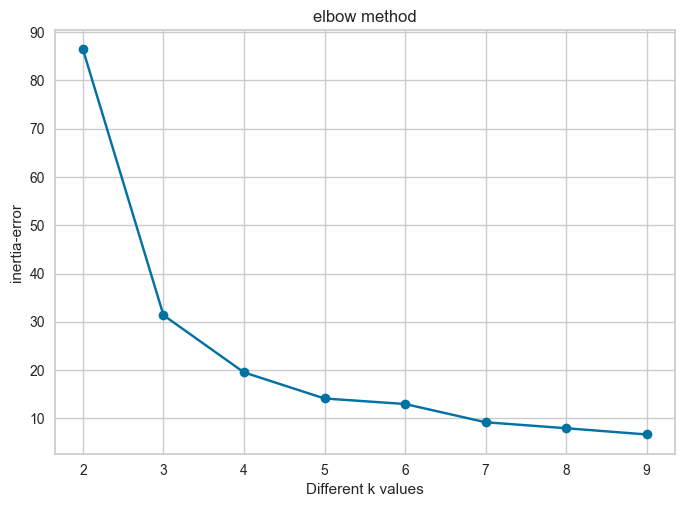

In [73]:
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method")

In [74]:
df_diff = pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df_diff

0
1        NaN
2  55.018861
3  11.841625
4   5.398840
5   1.143115
6   3.775674
7   1.236750
8   1.295116

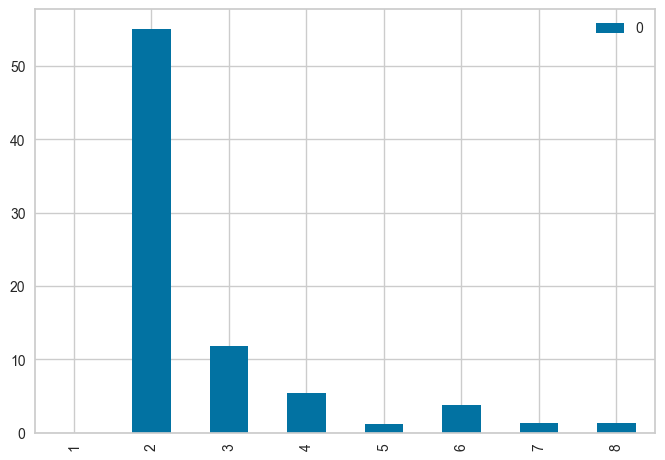

In [75]:
df_diff.plot(kind='bar');

## Yellowbrick bakışı

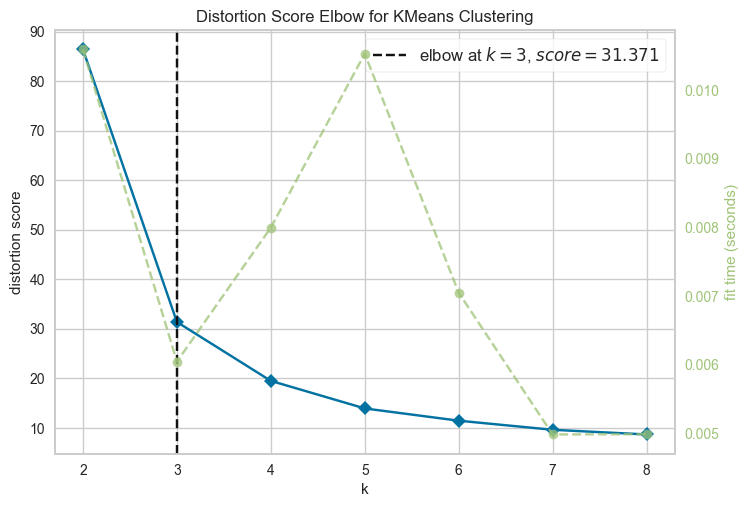

In [76]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,9))

visualizer.fit(X2)        # Fit the data to the visualizer
visualizer.show();

## Silhouette analysis

In [77]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X2)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X2, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.7653904101258123
For n_clusters=3, the silhouette score is 0.6604800083974887
For n_clusters=4, the silhouette score is 0.6127580794464402
For n_clusters=5, the silhouette score is 0.5883732712110276
For n_clusters=6, the silhouette score is 0.5617282184908394
For n_clusters=7, the silhouette score is 0.5536884823537347
For n_clusters=8, the silhouette score is 0.5245973293048308


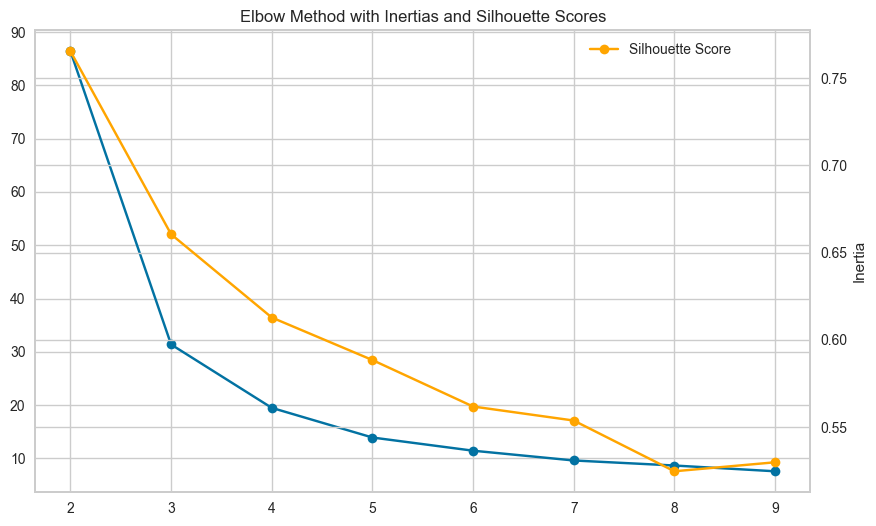

In [79]:
# Elbow + Silhoutee skorunu bir arada gösteren grafik

inertia_scores = []
silhouette_scores = []
for i in range(2, 10):
    model = KMeans(n_clusters=i, random_state=42)
    labels = model.fit_predict(X2)
    silhouette = silhouette_score(X2, labels)
    inertia = model.inertia_
    inertia_scores.append(inertia)
    silhouette_scores.append(silhouette)
    
# Plotting the Elbow Method with Inertias and Silhouette Scores
plt.figure(figsize=(10, 6))

# Plot Inertias
plt.plot(range(2,10), inertia_scores, label='Inertia', marker='o')

# Plot Silhouette Scores on a secondary y-axis
plt.twinx()
plt.plot(range(2,10), silhouette_scores, label='Silhouette Score', marker='o', color='orange')

# Add labels, title, and legend
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method with Inertias and Silhouette Scores')
plt.legend(loc='upper left', bbox_to_anchor=(0.7, 1))
plt.show()

Bu grafiğe göre de n_cluster=3 seçimimizin doğru olduğu görünüyor

## Silhouette Visualizer

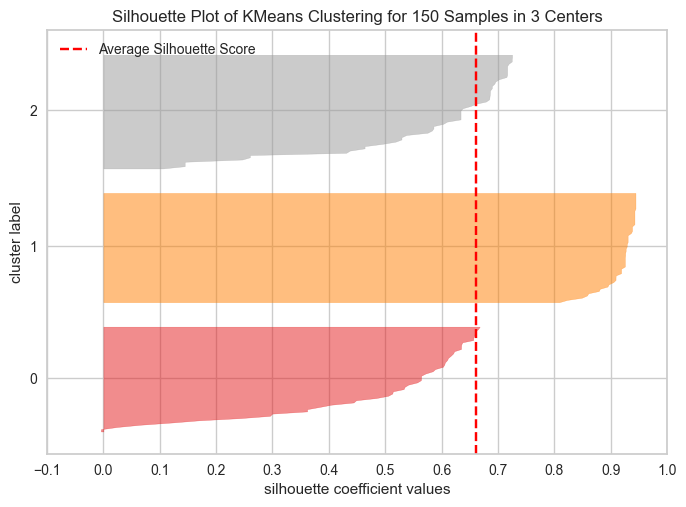

In [78]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model3 = KMeans(3, random_state=42)
visualizer = SilhouetteVisualizer(model3)

visualizer.fit(X2)    # Fit the data to the visualizer
visualizer.poof();

## Building the model based on the optimal number of clusters

X2 dataFrame'e  göre modeli eğitelim (2 feature vardı)

In [80]:
final_model = KMeans(n_clusters =3, random_state=42)
final_model.fit_predict(X2)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [81]:
X2["species"] = df["species"]
X2

petal_length  petal_width    species
0             1.4          0.2     setosa
1             1.4          0.2     setosa
2             1.3          0.2     setosa
3             1.5          0.2     setosa
4             1.4          0.2     setosa
..            ...          ...        ...
145           5.2          2.3  virginica
146           5.0          1.9  virginica
147           5.2          2.0  virginica
148           5.4          2.3  virginica
149           5.1          1.8  virginica

[150 rows x 3 columns]

In [82]:
X2["predicted_clusters"] = final_model.labels_
X2

petal_length  petal_width    species  predicted_clusters
0             1.4          0.2     setosa                   1
1             1.4          0.2     setosa                   1
2             1.3          0.2     setosa                   1
3             1.5          0.2     setosa                   1
4             1.4          0.2     setosa                   1
..            ...          ...        ...                 ...
145           5.2          2.3  virginica                   0
146           5.0          1.9  virginica                   0
147           5.2          2.0  virginica                   0
148           5.4          2.3  virginica                   0
149           5.1          1.8  virginica                   0

[150 rows x 4 columns]

## Adjust Rand Score

In [83]:
adjusted_rand_score(X2.species, X2.predicted_clusters)

0.8856970310281228

daha önce bu skoru 0.73 olarak bulmuştuk. şimdi yaklaşık 0,90 a kadar geliştiğini görüyoruz. 1'e yakın olması daha iyi bir kümelemeyi gösterir

## Compare results

In [84]:
# ct for 2 features
pd.crosstab(X2.predicted_clusters, X2.species)

species             setosa  versicolor  virginica
predicted_clusters                               
0                        0           2         46
1                       50           0          0
2                        0          48          4

Yeni yaklaşım sayesinde hatalı tahmin sayısını 17'den 6 ya indirmiş olduk. 

Eski CT skorlarımız altta görüldüğü gibi (17 adet)
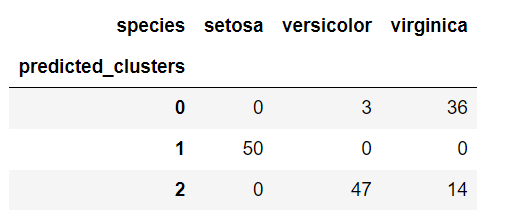

## Prediction cluster of new data

In [86]:
new_data = [[1.7, 0.2]]

In [87]:
final_model.predict(new_data)

array([1])

final_model adındaki eğitilmiş K-Means modelinin predict metodunu kullanarak new_data üzerinde tahmin yapar. predict metodu, verilen yeni veri noktasının hangi kümeye ait olduğunu belirler. Burada final_model, daha önce eğitilmiş ve K-Means algoritmasına dayanan bir modeldir.

## Summary 

Bir segmentasyon modelinin başarısı aşağıdaki yönlerde özetlenebilir:

İşletmenin hedefleri ile uyum,

Tanımlanan boyutların netliği

Zamanlamanın dikkatli bir şekilde değerlendirilmesi

Kümelerin iş hedeflerine uyarlanmasında esneklik

Zaman içinde istikrar

Sonuçta başarılı segmentasyon, farklı müşteri profillerini anlamak ve onlarla etkileşime geçmek için kapsamlı ve etkili bir çerçeve oluşturur.

https://towardsdatascience.com/customer-segmentation-more-than-clustering-a7226a9ff138

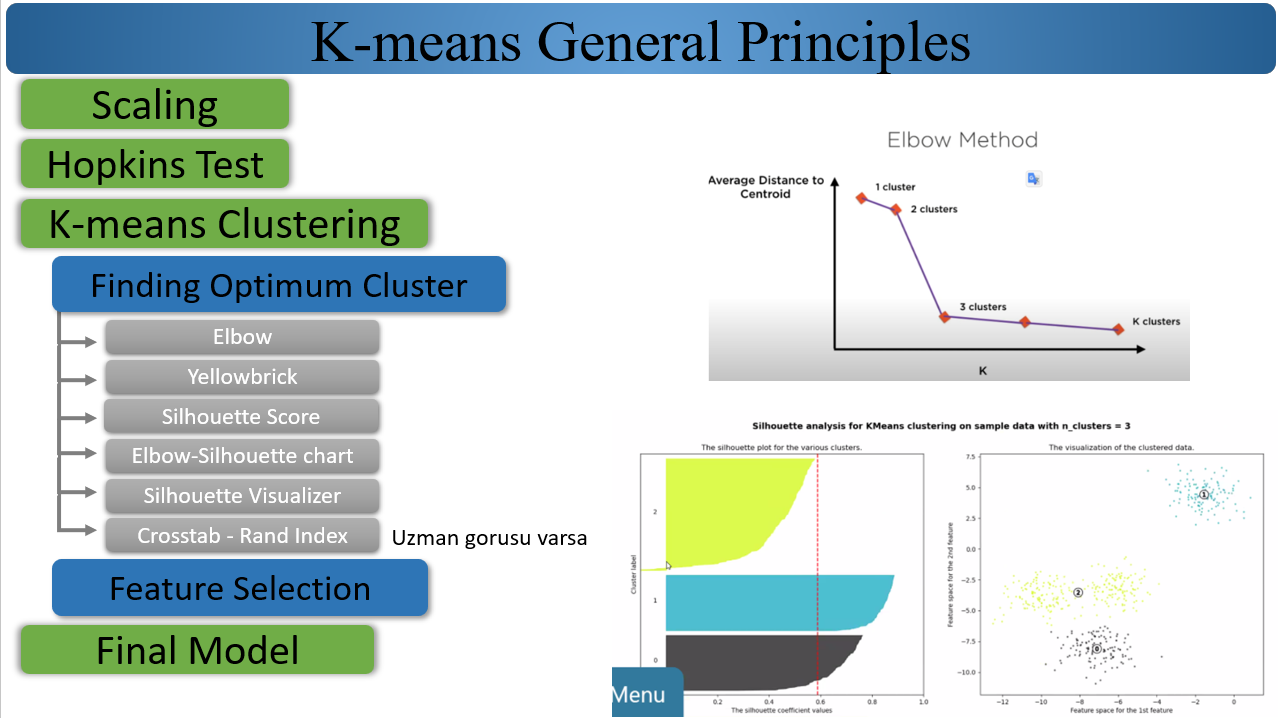